In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d import Axes3D

### Calculating $\gamma_{11}$

- CsCl (BCC): 9.3
- ZnS (diamond): 4.07
- NaCl (SC): 6.3

In [4]:
def create_lattice(basis, delta, unitcell_num, max_radius):
    '''
        Creates a lattice with the input basis and shift (delta). The unit cells forms
        a cube where each side has unitcell_num unit cells. Then select the lattice 
        sites within max_radius away from the origin.
    '''
    xc = []
    yc = []
    zc = []
    rc = []
    for i in range(-unitcell_num, unitcell_num+1, 1):
        for j in range(-unitcell_num, unitcell_num+1, 1):
            for k in range(-unitcell_num, unitcell_num+1, 1):
                xc_crt = (i+delta[0])*basis[0][0]+(j+delta[1])*basis[1][0]+(k+delta[2])*basis[2][0]
                yc_crt = (i+delta[0])*basis[0][1]+(j+delta[1])*basis[1][1]+(k+delta[2])*basis[2][1]
                zc_crt = (i+delta[0])*basis[0][2]+(j+delta[1])*basis[1][2]+(k+delta[2])*basis[2][2]
                rc_crt = np.sqrt(xc_crt**2 + yc_crt**2 + zc_crt**2)
                if rc_crt <= max_radius and rc_crt != 0:
                    xc.append(xc_crt)
                    yc.append(yc_crt)
                    zc.append(zc_crt)
                    
    return xc, yc, zc

In [5]:
# creating lattices

unitcell_num = 40 
lattice_type = 'diamond' 
max_radius = 20 
n = 1


if lattice_type == 'SC': # for NaCl type of lattice structure
    a = np.array([[1,0,0], [0,1,0], [0,0,1]])
    xc, yc, zc = create_lattice(basis=a, delta = (0,0,0), unitcell_num=unitcell_num, max_radius=max_radius)

elif lattice_type == 'BCC': # for CsCl type of lattice structure
    a = np.array([[1,0,0], [0,1,0], [0.5, 0.5, 0.5]])/(np.sqrt(3)/2)
    xc, yc, zc = create_lattice(basis=a, delta = (0,0,0), unitcell_num=unitcell_num, max_radius=max_radius)

elif lattice_type == 'diamond': # for ZnS type of lattice structure
    a = np.array([[0.5, 0.5, 0], [0.5, 0, 0.5], [0, 0.5, 0.5]])/(np.sqrt(3)/4)
    xc1, yc1, zc1 = create_lattice(basis=a, delta = (0,0,0), unitcell_num=unitcell_num, max_radius=max_radius)
    xc2, yc2, zc2 = create_lattice(basis=a, delta = (0.25, 0.25, 0.25), unitcell_num=unitcell_num, max_radius=max_radius)

    xc = xc1 + xc2
    yc = yc1 + yc2
    zc = zc1 + zc2


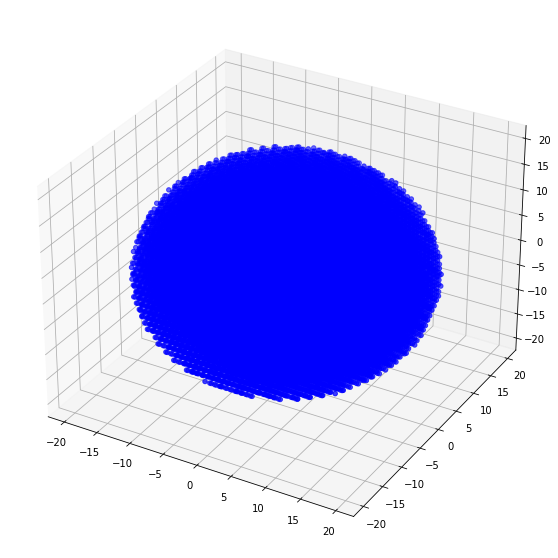

In [6]:
# plotting the lattice sites created

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')
ax.scatter3D(xc, yc, zc, c='b')

In [7]:
# calculating gamma 11

xc = np.array(xc)
yc = np.array(yc)
zc = np.array(zc)

gamma_11 = np.sum((np.sqrt(xc**2 + yc**2 + zc**2))**(-11))

print('Lattice type:', lattice_type)
print('Gamma 11:', gamma_11)
    

Lattice type: diamond
Gamma 11: 4.065467598934623


## Finding the phase diagram

In [2]:
lattice_type = ['NaCl (SC)', 'CsCl(BCC)', 'ZnS(Diamond)']
gamma_11 = [6.3, 9.3, 4.07]
gamma_6 = [8.04, 12.2, 5.12]
alpha = [1.747565, 1.762675, 1.6381]

/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in true_divide
  if __name__ == '__main__':
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in true_divide
  if __name__ == '__main__':
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in add
  # Remove the CWD from sys.path while we load stuff.
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


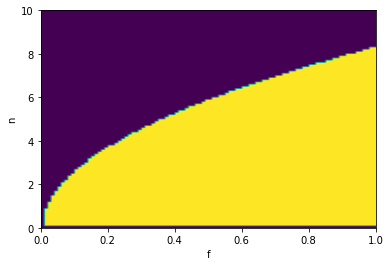

In [3]:
f_raw = np.linspace(0, 1, 100)
n_raw = np.linspace(0, 10, 100)

f, n = np.meshgrid(f_raw, n_raw)

U = [] # array of total energy of the 3 structures

for i in range(3):
    A = f/(n**2)
    F = (-3*gamma_6[i]/alpha[i]*A + 1/alpha[i]*np.sqrt(9*gamma_6[i]**2*A**2+11*alpha[i]*gamma_11[i]*A))**(1/5)
    U.append(-n**2*alpha[i]/F+f*gamma_11[i]/F**11-f*gamma_6[i]/F**6)

phase_diag = np.argmin(U, axis=0) # 0 for NaCl, 1 for CsCl, 2 for ZnS

plt.imshow(phase_diag, origin='lower', extent = [0, 1, 0, 10], aspect='auto')
plt.xlabel('f')
plt.ylabel('n')
plt.savefig('./ps1_2D_phaseDiag.pdf')

/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/jiatongyang/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in add
  from ipykernel import kernelapp as app


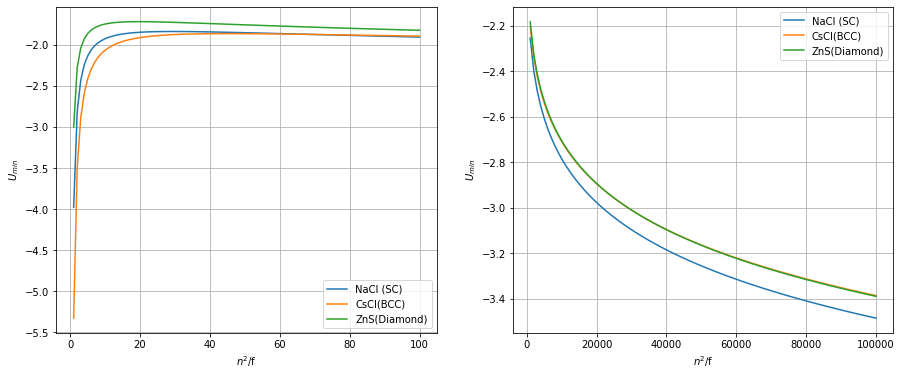

In [12]:
x_max = [100, 100000] 

fig, axes = plt.subplots(figsize=(15,6), nrows=1, ncols=2)


for j in range(len(x_max)): 
    x = np.linspace(0, x_max[j], 100)

    

    U_min = []

    for i in range(len(lattice_type)):
        
        F = (-3*gamma_6[i]/alpha[i]/x + 1/alpha[i]*np.sqrt(9*gamma_6[i]**2/x**2+11*alpha[i]*gamma_11[i]/x))**(1/5)
        U_min.append(-alpha[i]/F+gamma_11[i]/F**11/x-gamma_6[i]/F**6/x)
    
        axes[j].plot(x, U_min[i], label=lattice_type[i], c='C'+str(i))

    axes[j].set_xlabel('$n^2$/f')
    axes[j].set_ylabel('$U_{min}$')
    axes[j].legend()
    axes[j].grid()

fig.savefig('./ps1_1D_phaseDiag.pdf')

